In [78]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# The goal of this notebook is to examine 3 things:
# 1. average revenue to budget ratio (scalar value)
# 2. Does having a larger budget lead to more revenue?
# 3. Does having a larger budget lead to better ratings?

In [80]:
# read in cleaned movies metainformation
metainfo_data = pd.read_csv('Datasets/cleaned-movies-metainformation.csv')

# We only need budget, id, and revenue, so let's drop all of the other columns.
metainfo_data.drop(['adult', 'belongs_to_collection', 'genres', 'original_language', 'popularity', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'], axis = 1, inplace = True)

# Now we want to get rid of all the rows where budget or revenue is null.
# QUESTION: Do we want to remove rows where budget or revenue equals 0?
index_names = metainfo_data[metainfo_data['budget'].isnull() | metainfo_data['revenue'].isnull()].index
metainfo_data.drop(index_names, inplace = True)

# To make sure we still have enough data to work with after dropping all of these rows, let's check the size of our dataframe.
print(metainfo_data.size)
# Seems like we have enough data to work with even after all the drops.

# Proceed to check the first few columns of our dataframe.
metainfo_data.head()
# The data looks good, so let's move on!

21520


,budget,id,original_title,revenue
0,30000000.0,862,Toy Story,373554033.0
1,65000000.0,8844,Jumanji,262797249.0
3,16000000.0,31357,Waiting to Exhale,81452156.0
5,60000000.0,949,Heat,187436818.0
8,35000000.0,9091,Sudden Death,64350171.0


In [81]:
# The first thing we want to do is find the average revenue to budget ratio.
# We can find this value by finding the revenue to budget ratio for each row and then averaging all of the ratios.
ratios_sum = 0
for index, row in metainfo_data.iterrows():
    ratios_sum += row['revenue'] / row['budget']
ratios_avg = ratios_sum / metainfo_data.size
# The average revenue to budget ratio means that on average, for every dollar spent on the movie budget, 1855.64 dollars will be made in revenue.
print(ratios_avg)

1391.7330088091044


C:\Users\bonni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation between Movie Budget and Revenue')

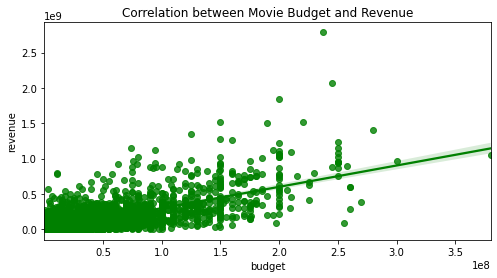

In [82]:
# The next hing we want to tackle is the following question: Does having a larger budget lead to more revenue?
plt.figure(figsize=(8, 4))
sns.regplot(metainfo_data['budget'],metainfo_data['revenue'], color='g').set_title("Correlation between Movie Budget and Revenue")

# REMOVE LATER: THESE ARE ALTERNATIVE APPROACHES I TOOK TO MAKING THIS GRAPH
# Approach #1
#sns.scatterplot(metainfo_data['budget'], metainfo_data['revenue']);
#plt.title('Correlation between Movie Budget and Revenue');
#plt.xlabel('Budget');
#plt.ylabel('Revenue');
# Approach #2
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [83]:
# Now let's examine the above graph in a little bit more detail. We notice that there are a couple of seemingly "extreme" points in our graph.

# Notice that the movie that made the most revenue didn't have the highest budget. Let's find out the name of this movie.
max_rev_index = metainfo_data[['revenue']].idxmax()
max_rev_movie = metainfo_data._get_value(max_rev_index['revenue'], "original_title")
print(max_rev_movie, "made the most revenue (", metainfo_data['revenue'].max(), ") and only had a budget of", metainfo_data._get_value(max_rev_index['revenue'], "budget"))

# On the other hand, notice that the movie that had the largest budget did not make the most revenue. Let's find out the name of this movie.
max_budget_index = metainfo_data[['budget']].idxmax()
max_budget_movie = metainfo_data._get_value(max_budget_index['budget'], "original_title")
print(max_budget_movie, "had the largest budget (", metainfo_data['budget'].max(), ") but only had a revenue of", metainfo_data._get_value(max_budget_index['budget'], "revenue"))

Avatar made the most revenue ( 2787965087.0 ) and only had a budget of 237000000.0
Pirates of the Caribbean: On Stranger Tides had the largest budget ( 380000000.0 ) but only had a revenue of 1045713802.0
